In [1]:
%pylab inline
from scipy.optimize import curve_fit
from scipy.integrate import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gauss(x, A, mu, sigma):
        return A * exp(-1 * (x - mu)**2 / (2 * sigma**2))
    
def lin(x, D, b):  #a leírásban nem volt +konstans, de kéne
    return 4 * pi * D * x + b
    
def illeszt(f, x, y):
    popt,pcov=curve_fit(f, x, y) # az illesztés elvégzése
    perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
    return popt, perr

In [3]:
#leolvasás helyei (mindenhol ez)

x1 = np.array([-7, -5, -3, 0, 2, 3, 5])

#értékek a leolvasási pontokban

y1_1 = np.array([2, 4, 8, 25, 21, 4, 2])
y1_2 = np.array([2, 5, 9, 23, 20, 9, 3])
y1_3 = np.array([3, 5, 10, 20, 18, 12, 3])
y1_4 = np.array([4, 6, 10, 18, 17, 11, 5])
y1_5 = np.array([6, 8, 12, 17, 15, 14, 8])
y1_6 = np.array([7, 8, 11, 15, 14, 13, 9])
y1_7 = np.array([6, 9, 11, 13, 12, 11, 8])

In [4]:
#Gauss-görbe illesztés

popt1_1, perr1_1 = illeszt(gauss, x1, y1_1)
popt1_2, perr1_2 = illeszt(gauss, x1, y1_2)
popt1_3, perr1_3 = illeszt(gauss, x1, y1_3)
popt1_4, perr1_4 = illeszt(gauss, x1, y1_4)
popt1_5, perr1_5 = illeszt(gauss, x1, y1_5)
popt1_6, perr1_6 = illeszt(gauss, x1, y1_6)
popt1_7, perr1_7 = illeszt(gauss, x1, y1_7)

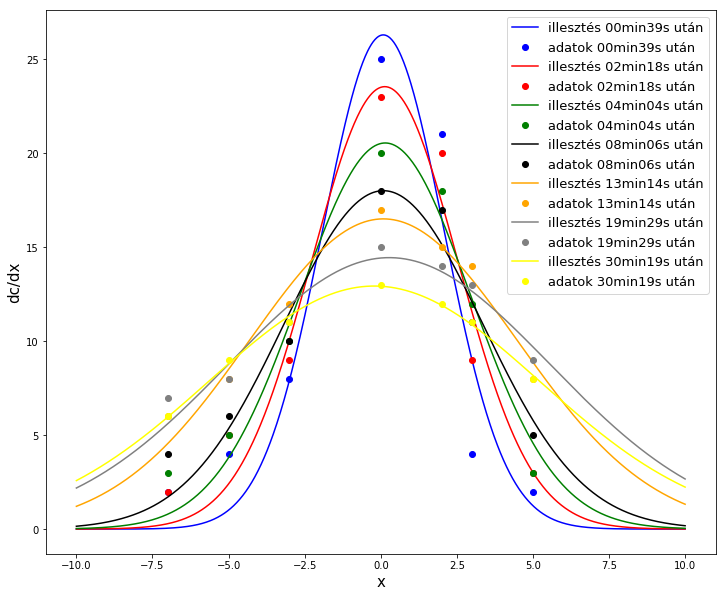

In [5]:
x = linspace(-10, 10, 1000)

figsize(12, 10)
xlabel('x', fontsize = 15)
ylabel('dc/dx', fontsize = 15)
#title('Koncentrációgradiens 1 mólos ZnSO4 oldat esetén', fontsize = 20)

plot(x, gauss(x, popt1_1[0], popt1_1[1], popt1_1[2]), color = 'blue', label = 'illesztés 00min39s után')
plot(x1, y1_1, marker = 'o', linestyle = '', color = 'blue', label = 'adatok 00min39s után')
plot(x, gauss(x, popt1_2[0], popt1_2[1], popt1_2[2]), color = 'red', label = 'illesztés 02min18s után')
plot(x1, y1_2, marker = 'o', linestyle = '', color = 'red', label = 'adatok 02min18s után')
plot(x, gauss(x, popt1_3[0], popt1_3[1], popt1_3[2]), color = 'green', label = 'illesztés 04min04s után')
plot(x1, y1_3, marker = 'o', linestyle = '', color = 'green', label = 'adatok 04min04s után')
plot(x, gauss(x, popt1_4[0], popt1_4[1], popt1_4[2]), color = 'black', label = 'illesztés 08min06s után')
plot(x1, y1_4, marker = 'o', linestyle = '', color = 'black', label = 'adatok 08min06s után')
plot(x, gauss(x, popt1_5[0], popt1_5[1], popt1_5[2]), color = 'orange', label = 'illesztés 13min14s után')
plot(x1, y1_5, marker = 'o', linestyle = '', color = 'orange', label = 'adatok 13min14s után')
plot(x, gauss(x, popt1_6[0], popt1_6[1], popt1_6[2]), color = 'grey', label = 'illesztés 19min29s után')
plot(x1, y1_6, marker = 'o', linestyle = '', color = 'grey', label = 'adatok 19min29s után')
plot(x, gauss(x, popt1_7[0], popt1_7[1], popt1_7[2]), color = 'yellow', label = 'illesztés 30min19s után')
plot(x1, y1_7, marker = 'o', linestyle = '', color = 'yellow', label = 'adatok 30min19s után')

savefig('1mol.png')
legend(loc = 'best', fontsize = 13)



In [6]:
#görbe maximuma

M1_1 = gauss(popt1_1[1], popt1_1[0], popt1_1[1], popt1_1[2]) / 9  
M1_2 = gauss(popt1_2[1], popt1_2[0], popt1_2[1], popt1_2[2]) / 9
M1_3 = gauss(popt1_3[1], popt1_3[0], popt1_3[1], popt1_3[2]) / 9
M1_4 = gauss(popt1_4[1], popt1_4[0], popt1_4[1], popt1_4[2]) / 9
M1_5 = gauss(popt1_5[1], popt1_5[0], popt1_5[1], popt1_5[2]) / 9
M1_6 = gauss(popt1_6[1], popt1_6[0], popt1_6[1], popt1_6[2]) / 9
M1_7 = gauss(popt1_7[1], popt1_7[0], popt1_7[1], popt1_7[2]) / 9

M1 = np.array([M1_1, M1_2, M1_3, M1_4, M1_5, M1_6, M1_7])
print('magasságok lenormálva: ', M1)

magasságok lenormálva:  [2.92206713 2.61608965 2.28307017 2.00094898 1.83424712 1.6050877
 1.43712387]


In [7]:
#görbe alatti terület 

F1_1 = quad(gauss, -inf, inf, args = (popt1_1[0], popt1_1[1], popt1_1[2])) 
F1_2 = quad(gauss, -inf, inf, args = (popt1_2[0], popt1_2[1], popt1_2[2]))
F1_3 = quad(gauss, -inf, inf, args = (popt1_3[0], popt1_3[1], popt1_3[2]))
F1_4 = quad(gauss, -inf, inf, args = (popt1_4[0], popt1_4[1], popt1_4[2]))
F1_5 = quad(gauss, -inf, inf, args = (popt1_5[0], popt1_5[1], popt1_5[2]))
F1_6 = quad(gauss, -inf, inf, args = (popt1_6[0], popt1_6[1], popt1_6[2]))
F1_7 = quad(gauss, -inf, inf, args = (popt1_7[0], popt1_7[1], popt1_7[2]))

F1 = np.array([F1_1[0]/81, F1_2[0]/81, F1_3[0]/81, F1_4[0]/81, F1_5[0]/81, F1_6[0]/81, F1_7[0]/81])
print('területek lenormálva: ', F1)

területek lenormálva:  [1.62001694 1.74999823 1.78116199 1.81845213 2.25432772 2.36434339
 2.18171408]


In [8]:
y1 = (F1/M1)**2
print('(F/M)^2 értékek: ', y1)
t1 = np.array([39, 138, 244, 486, 794, 1169, 1819])

(F/M)^2 értékek:  [0.30736806 0.44747624 0.60865097 0.82590808 1.51049193 2.16981932
 2.30466211]


In [9]:
#egyenes illesztése

popt_lin_1, perr_lin_1 = illeszt(lin, t1, y1)
print('D= ', popt_lin_1[0], '+- ' , perr_lin_1[0])
print('b= ', popt_lin_1[1], '+- ' , perr_lin_1[1])

D=  9.865838441884382e-05 +-  1.214846746093496e-05
b=  0.3372940680364896 +-  0.13681379172472127


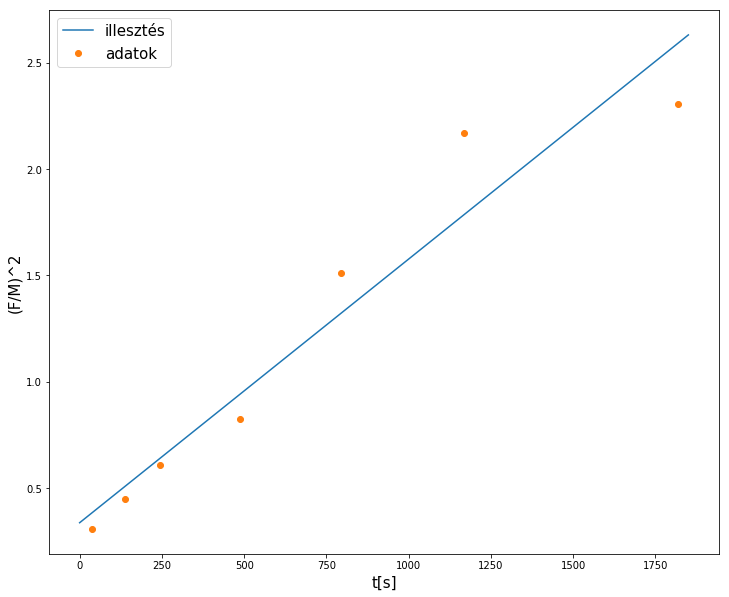

In [10]:
t = linspace(0, 1850, 5000)

xlabel('t[s]', fontsize = 15)
ylabel('(F/M)^2', fontsize = 15)
#title('Diffúziós állandó meghatározása 1 mólos ZnSO4 oldatnál', fontsize = 20)
plot(t, lin(t, popt_lin_1[0], popt_lin_1[1]), label = 'illesztés')
plot(t1, y1, marker = 'o', linestyle = '', label = 'adatok')
legend(loc = 'best', fontsize = 15)
savefig('1mol_D.png')



In [11]:
#értékek a pontokban

y2_1 = np.array([2, 4, 7, 12, 8, 5, 2])
y2_2 = np.array([3, 5, 7, 11, 8, 6, 2])
y2_3 = np.array([3, 6, 8, 9, 8, 7, 3])
y2_4 = np.array([4, 6, 7, 9, 7, 6, 3])
y2_5 = np.array([5, 6, 7, 8, 7, 5, 3])
y2_6 = np.array([5, 6, 6.5, 7, 6, 5.5, 4])
y2_7 = np.array([5.5, 6, 6, 6.5, 6, 5.5, 5])

In [12]:
#Gauss-görbe illesztése

popt2_1, perr2_1 = illeszt(gauss, x1, y2_1)
popt2_2, perr2_2 = illeszt(gauss, x1, y2_2)
popt2_3, perr2_3 = illeszt(gauss, x1, y2_3)
popt2_4, perr2_4 = illeszt(gauss, x1, y2_4)
popt2_5, perr2_5 = illeszt(gauss, x1, y2_5)
popt2_6, perr2_6 = illeszt(gauss, x1, y2_6)
popt2_7, perr2_7 = illeszt(gauss, x1, y2_7)

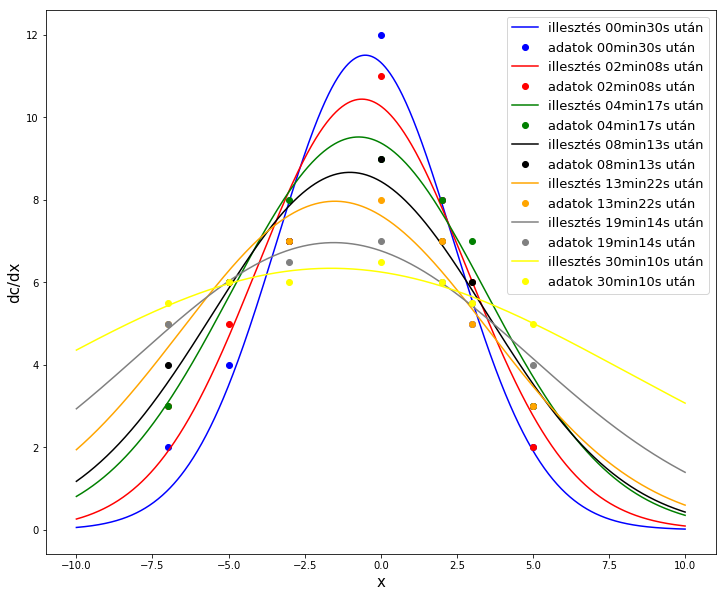

In [34]:
xlabel('x', fontsize = 15)
ylabel('dc/dx', fontsize = 15)
#title('Koncentrációgradiens 0.5 mólos ZnSO4 oldat esetén', fontsize = 20)

plot(x, gauss(x, popt2_1[0], popt2_1[1], popt2_1[2]), color = 'blue', label = 'illesztés 00min30s után')
plot(x1, y2_1, marker = 'o', linestyle = '', color = 'blue', label = 'adatok 00min30s után')
plot(x, gauss(x, popt2_2[0], popt2_2[1], popt2_2[2]), color = 'red', label = 'illesztés 02min08s után')
plot(x1, y2_2, marker = 'o', linestyle = '', color = 'red', label = 'adatok 02min08s után')
plot(x, gauss(x, popt2_3[0], popt2_3[1], popt2_3[2]), color = 'green', label = 'illesztés 04min17s után')
plot(x1, y2_3, marker = 'o', linestyle = '', color = 'green', label = 'adatok 04min17s után')
plot(x, gauss(x, popt2_4[0], popt2_4[1], popt2_4[2]), color = 'black', label = 'illesztés 08min13s után')
plot(x1, y2_4, marker = 'o', linestyle = '', color = 'black', label = 'adatok 08min13s után')
plot(x, gauss(x, popt2_5[0], popt2_5[1], popt2_5[2]), color = 'orange', label = 'illesztés 13min22s után')
plot(x1, y2_5, marker = 'o', linestyle = '', color = 'orange', label = 'adatok 13min22s után')
plot(x, gauss(x, popt2_6[0], popt2_6[1], popt2_6[2]), color = 'grey', label = 'illesztés 19min14s után')
plot(x1, y2_6, marker = 'o', linestyle = '', color = 'grey', label = 'adatok 19min14s után')
plot(x, gauss(x, popt2_7[0], popt2_7[1], popt2_7[2]), color = 'yellow', label = 'illesztés 30min10s után')
plot(x1, y2_7, marker = 'o', linestyle = '', color = 'yellow', label = 'adatok 30min10s után')

savefig('0,5mol.png')
legend(loc = 'best', fontsize = 13)



In [14]:
#maximumok

M2_1 = gauss(popt2_1[1], popt2_1[0], popt2_1[1], popt2_1[2]) / 9
M2_2 = gauss(popt2_2[1], popt2_2[0], popt2_2[1], popt2_2[2]) / 9
M2_3 = gauss(popt2_3[1], popt2_3[0], popt2_3[1], popt2_3[2]) / 9
M2_4 = gauss(popt2_4[1], popt2_4[0], popt2_4[1], popt2_4[2]) / 9
M2_5 = gauss(popt2_5[1], popt2_5[0], popt2_5[1], popt2_5[2]) / 9
M2_6 = gauss(popt2_6[1], popt2_6[0], popt2_6[1], popt2_6[2]) / 9
M2_7 = gauss(popt2_7[1], popt2_7[0], popt2_7[1], popt2_7[2]) / 9

M2 = np.array([M2_1, M2_2, M2_3, M2_4, M2_5, M2_6, M2_7])
print('magasságok lenormálva: ', M2)

magasságok lenormálva:  [1.27868117 1.16028106 1.05833522 0.96299807 0.88522241 0.77372091
 0.70455304]


In [15]:
#görbe alatti területek

F2_1 = quad(gauss, -inf, inf, args = (popt2_1[0], popt2_1[1], popt2_1[2]))
F2_2 = quad(gauss, -inf, inf, args = (popt2_2[0], popt2_2[1], popt2_2[2]))
F2_3 = quad(gauss, -inf, inf, args = (popt2_3[0], popt2_3[1], popt2_3[2]))
F2_4 = quad(gauss, -inf, inf, args = (popt2_4[0], popt2_4[1], popt2_4[2]))
F2_5 = quad(gauss, -inf, inf, args = (popt2_5[0], popt2_5[1], popt2_5[2]))
F2_6 = quad(gauss, -inf, inf, args = (popt2_6[0], popt2_6[1], popt2_6[2]))
F2_7 = quad(gauss, -inf, inf, args = (popt2_7[0], popt2_7[1], popt2_7[2]))

F2 = np.array([F2_1[0]/81, F2_2[0]/81, F2_3[0]/81, F2_4[0]/81, F2_5[0]/81, F2_6[0]/81, F2_7[0]/81])
print('területek lenormálva: ', F2)

területek lenormálva:  [1.03657752 1.11547128 1.2306066  1.20550362 1.24648689 1.38655985
 1.89566067]


In [16]:
y2 = (F2/M2)**2
print('(F/M)^2 értékek:', y2)
t2 = np.array([30, 128, 257, 493, 802, 1154, 1810])

(F/M)^2 értékek: [0.65717197 0.92425195 1.3520476  1.56706208 1.98276218 3.21150474
 7.23925392]


In [17]:
#egyenes illesztése

popt_lin_2, perr_lin_2 = illeszt(lin, t2, y2)
print('D= ', popt_lin_2[0], '+- ' , perr_lin_2[0])
print('b= ', popt_lin_2[1], '+- ' , perr_lin_2[1])

D=  0.0002705028271116193 +-  3.8475089784045385e-05
b=  0.14943033624633292 +-  0.4315751754211914


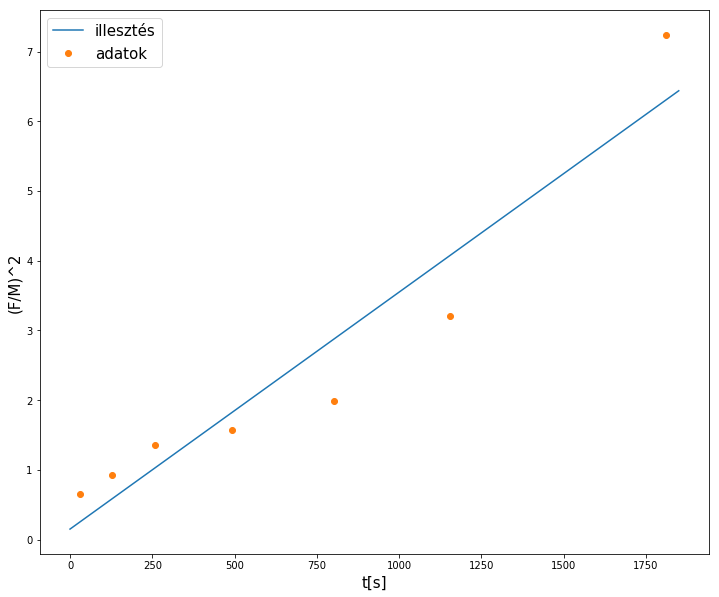

In [18]:
xlabel('t[s]', fontsize = 15)
ylabel('(F/M)^2', fontsize = 15)
#title('Diffúziós állandó meghatározása 0.5 mólos ZnSO4 oldatnál', fontsize = 20)
plot(t, lin(t, popt_lin_2[0], popt_lin_2[1]), label = 'illesztés')
plot(t2, y2, marker = 'o', linestyle = '', label = 'adatok')
legend(loc = 'best', fontsize = 15)
savefig('0,5mol_D.png')



In [19]:
#értékek a pontokban

y3_1 = np.array([2, 3, 6, 9, 8, 4, 2])
y3_2 = np.array([3, 4, 7, 9, 7, 4, 2])
y3_3 = np.array([3, 5, 7, 8, 6, 5, 2])
y3_4 = np.array([2, 4, 6, 7, 6, 5, 2])
y3_5 = np.array([2, 3, 5, 6, 5, 4, 3])
y3_6 = np.array([1, 3, 4, 5.5, 5, 4, 3])

In [20]:
#Gauss-görbe illesztése

popt3_1, perr3_1 = illeszt(gauss, x1, y3_1)
popt3_2, perr3_2 = illeszt(gauss, x1, y3_2)
popt3_3, perr3_3 = illeszt(gauss, x1, y3_3)
popt3_4, perr3_4 = illeszt(gauss, x1, y3_4)
popt3_5, perr3_5 = illeszt(gauss, x1, y3_5)
popt3_6, perr3_6 = illeszt(gauss, x1, y3_6)

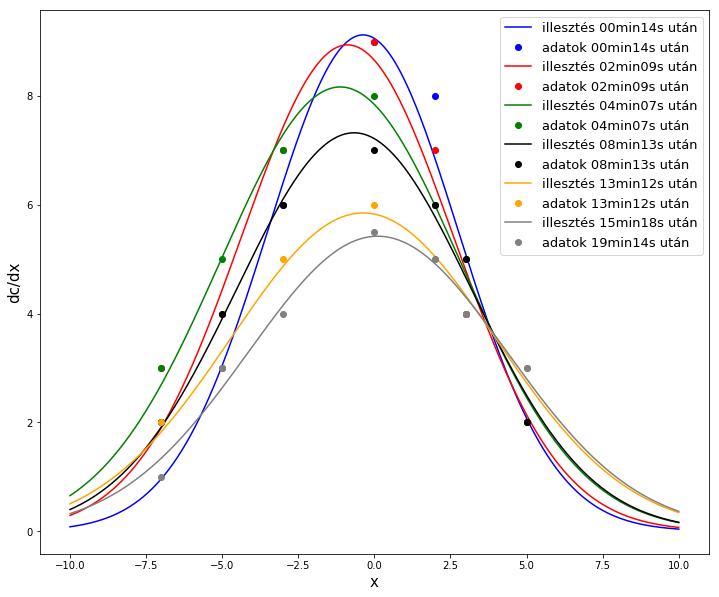

In [21]:
xlabel('x', fontsize = 15)
ylabel('dc/dx', fontsize = 15)
#title('Koncentrációgradiens 0.33 mólos ZnSO4 oldat esetén', fontsize = 20)

plot(x, gauss(x, popt3_1[0], popt3_1[1], popt3_1[2]), color = 'blue', label = 'illesztés 00min14s után')
plot(x1, y3_1, marker = 'o', linestyle = '', color = 'blue', label = 'adatok 00min14s után')
plot(x, gauss(x, popt3_2[0], popt3_2[1], popt3_2[2]), color = 'red', label = 'illesztés 02min09s után')
plot(x1, y3_2, marker = 'o', linestyle = '', color = 'red', label = 'adatok 02min09s után')
plot(x, gauss(x, popt3_3[0], popt3_3[1], popt3_3[2]), color = 'green', label = 'illesztés 04min07s után')
plot(x1, y3_3, marker = 'o', linestyle = '', color = 'green', label = 'adatok 04min07s után')
plot(x, gauss(x, popt3_4[0], popt3_4[1], popt3_4[2]), color = 'black', label = 'illesztés 08min13s után')
plot(x1, y3_4, marker = 'o', linestyle = '', color = 'black', label = 'adatok 08min13s után')
plot(x, gauss(x, popt3_5[0], popt3_5[1], popt3_5[2]), color = 'orange', label = 'illesztés 13min12s után')
plot(x1, y3_5, marker = 'o', linestyle = '', color = 'orange', label = 'adatok 13min12s után')
plot(x, gauss(x, popt3_6[0], popt3_6[1], popt3_6[2]), color = 'grey', label = 'illesztés 15min18s után')
plot(x1, y3_6, marker = 'o', linestyle = '', color = 'grey', label = 'adatok 19min14s után')

savefig('0,33mol.png')
legend(loc = 'best', fontsize = 13)



In [22]:
#maximumok

M3_1 = gauss(popt3_1[1], popt3_1[0], popt3_1[1], popt3_1[2]) / 9
M3_2 = gauss(popt3_2[1], popt3_2[0], popt3_2[1], popt3_2[2]) / 9
M3_3 = gauss(popt3_3[1], popt3_3[0], popt3_3[1], popt3_3[2]) / 9
M3_4 = gauss(popt3_4[1], popt3_4[0], popt3_4[1], popt3_4[2]) / 9
M3_5 = gauss(popt3_5[1], popt3_5[0], popt3_5[1], popt3_5[2]) / 9
M3_6 = gauss(popt3_6[1], popt3_6[0], popt3_6[1], popt3_6[2]) / 9

M3 = np.array([M3_1, M3_2, M3_3, M3_4, M3_5, M3_6])
print('magasságok lenormálva: ', M3)

magasságok lenormálva:  [1.01359448 0.99325483 0.90726737 0.81365098 0.64989975 0.60240972]


In [23]:
#görbe alatti területek

F3_1 = quad(gauss, -inf, inf, args = (popt3_1[0], popt3_1[1], popt3_1[2]))
F3_2 = quad(gauss, -inf, inf, args = (popt3_2[0], popt3_2[1], popt3_2[2]))
F3_3 = quad(gauss, -inf, inf, args = (popt3_3[0], popt3_3[1], popt3_3[2]))
F3_4 = quad(gauss, -inf, inf, args = (popt3_4[0], popt3_4[1], popt3_4[2]))
F3_5 = quad(gauss, -inf, inf, args = (popt3_5[0], popt3_5[1], popt3_5[2]))
F3_6 = quad(gauss, -inf, inf, args = (popt3_6[0], popt3_6[1], popt3_6[2]))

F3 = np.array([F3_1[0]/81, F3_2[0]/81, F3_3[0]/81, F3_4[0]/81, F3_5[0]/81, F3_6[0]/81])
print('területek lenormálva: ', F3)

területek lenormálva:  [0.88171551 0.9623897  0.99780708 0.87562399 0.78671977 0.71365909]


In [24]:
y3 = (F3/M3)**2
print('(F/M)^2 értékek:', y3)
t3 = np.array([14, 129, 247, 493, 792, 918])

(F/M)^2 értékek: [0.75670829 0.93881617 1.20954653 1.15813449 1.46537029 1.40345232]


In [25]:
#egyenes illesztése

popt_lin_3, perr_lin_3 = illeszt(lin, t3, y3)
print('D= ', popt_lin_3[0], '+- ' , perr_lin_3[0])
print('b= ', popt_lin_3[1], '+- ' , perr_lin_3[1])

D=  5.396827035990648e-05 +-  1.1717614530653503e-05
b=  0.8622489394854135 +-  0.08044648041116087


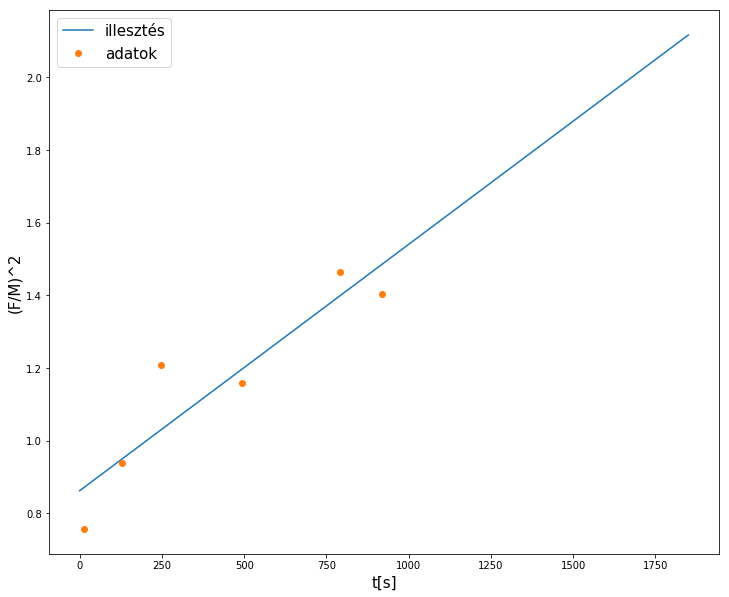

In [26]:
xlabel('t[s]', fontsize = 15)
ylabel('(F/M)^2', fontsize = 15)
#title('Diffúziós állandó meghatározása 0.33 mólos ZnSO4 oldatnál', fontsize = 20)
plot(t, lin(t, popt_lin_3[0], popt_lin_3[1]), label = 'illesztés')
plot(t3, y3, marker = 'o', linestyle = '', label = 'adatok')
legend(loc = 'best', fontsize = 15)
savefig('0,33mol_D.png')

